TensorFlow version: 2.19.0

Random Train Image:
Showing image: 050.jpg


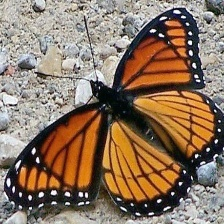


Random Validation Image:
Showing image: 3.jpg


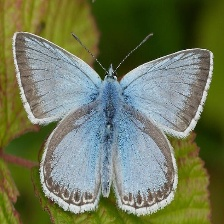


Random Test Image:
Showing image: 4.jpg


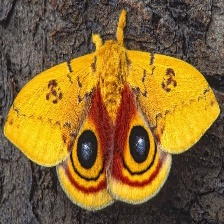

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,434,852 (9.29 MB)

 Trainable params: 176,868 (690.89 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 104s 260ms/step - accuracy: 0.2548 - loss: 3.3492 - val_accuracy: 0.7860 - val_loss: 0.8844
Epoch 2/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 110s 280ms/step - accuracy: 0.7239 - loss: 1.0482 - val_accuracy: 0.8340 - val_loss: 0.5999
Epoch 3/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 108s 274ms/step - accuracy: 0.8040 - loss: 0.7058 - val_accuracy: 0.8800 - val_loss: 0.4656
Epoch 4/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 112s 285ms/step - accuracy: 0.8462 - loss: 0.5408 - val_accuracy: 0.8980 - val_loss: 0.3918
Epoch 5/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 134s 341ms/step - accuracy: 0.8689 - loss: 0.4479 - val_accuracy: 0.8720 - val_loss: 0.4124
Epoch 6/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 141s 359ms/step - accuracy: 0.8818 - loss: 0.3891 - val_accuracy: 0.8940 - val_loss: 0.3889
Epoch 7/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 133s 337ms/step - accuracy: 0.8999 - loss: 0.3393 - val_accuracy: 0.8980 - val_loss: 0.3571
Epoch 8/10
394/394 ━━━━━━━━━━━━━━━━━━━━ 145s 367ms/step - accuracy: 0.9090 - loss: 0.30

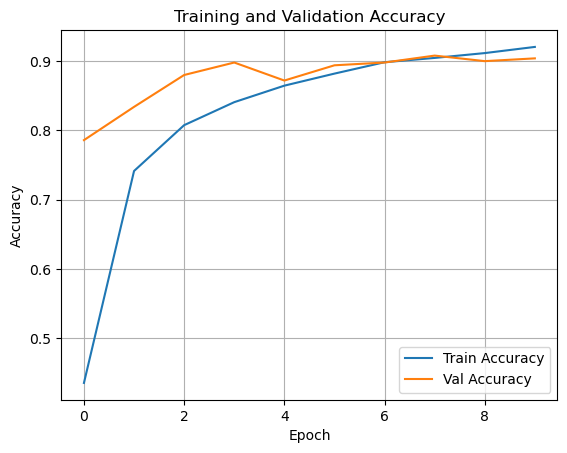


Testing on new image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Predicted Class Index: 79
Predicted Class Name: QUESTION MARK


In [1]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
from tensorflow.keras import layers, models  # type: ignore
import matplotlib.pyplot as plt
from IPython.display import Image, display

print("TensorFlow version:", tf.__version__)

train_dir = "butterfly_classifier_app/train"
val_dir = "butterfly_classifier_app/valid"
test_dir = "butterfly_classifier_app/test"

img_size = (224, 224)
batch_size = 32

def visualize_random_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
    selected_image = random.choice(image_files)
    image_path = os.path.join(folder_path, selected_image)
    print(f"Showing image: {selected_image}")
    display(Image(filename=image_path))

print("\nRandom Train Image:")
visualize_random_image(os.path.join(train_dir, random.choice(os.listdir(train_dir))))

print("\nRandom Validation Image:")
visualize_random_image(os.path.join(val_dir, random.choice(os.listdir(val_dir))))

print("\nRandom Test Image:")
visualize_random_image(os.path.join(test_dir, random.choice(os.listdir(test_dir))))

datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
val_data = datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)
test_data = datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical'
)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3), include_top=False, weights='imagenet'
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(train_data, validation_data=val_data, epochs=10)

test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Accuracy: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

model.save("butterfly_mobilenetv2_model.h5")

from tensorflow.keras.preprocessing import image  # type: ignore
import numpy as np

model = tf.keras.models.load_model("butterfly_mobilenetv2_model.h5")

class_indices = train_data.class_indices
labels = dict((v, k) for k, v in class_indices.items())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions, axis=1)[0]
    predicted_class = labels[predicted_index]
    print(f"Predicted Class Index: {predicted_index}")
    print(f"Predicted Class Name: {predicted_class}")

sample_path = os.path.join(
    test_dir,
    random.choice(os.listdir(test_dir)),
    random.choice(os.listdir(os.path.join(test_dir, random.choice(os.listdir(test_dir)))))
)

print("\nTesting on new image:")
predict_image(sample_path)
